# Introduction to Data Science – Lecture 13 – Web Scraping
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/* 

In this lecture we will explore how we can extract data from a web-page using automatic scraping and crawling with [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/).

First, we'll talk a bit about HTML though. 

## HTML and the DOM

We will scrape web-pages that are (partially) written in HTML and represented in the DOM. DOM stands for  Document Object Model, while HTML stands for “HyperText Markup Language”. 25 years ago, that used to be a meaningful description of what HTML actually did: it has links (hypertext), and it is a markup language. The latest version of HTML, however, the HTML5 standard, does much, much more: graphics, audio, video, etc. So it is easier to think of HTML as “whatever it is that web browsers know how to interpret”, and just not think about the actual term.

### Elements

The important thing about HTML is that the markup is represented by elements. An HTML element is a portion of the content that is surrounded by a pair of tags of the same name. Like this:

```html
<strong>This is an HTML element.</strong>
```

In this element, strong is the name of the tag; the open tag is `<strong>`, and the matching closing tag is `</strong>`. The way you should interpret this is that the text “This is an HTML element” should be “strong”, i.e., typically this will be bold text.

HTML elements can and commonly do nest:

```html
<strong>This is strong, and <u>this is underlined and strong.</u></strong>
```

In addition to the names, opening tags can contain extra information about the element. These are called attributes:

```html
<a href='http://www.google.com'>A link to Google's main page</a>
```

In this case, we’re using the `a` element which stood for “anchor”, but now is almost universally used as a “link”. The attribute `href` means “HTML reference”. The meaning given to each attribute changes from element to element.

Other important attributes for our purposes are `id` and `class`. The id attribute gives the attribute a unique identifier, which can then be used to access the element programmatically. Think of it as making the element accessible via a global variable.  

The class is similar but is intended to be applied to a whole “class” of elements. 

HTML pages require some boilerplate. Here is a minimal page: 

```html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title></title>
</head>
<body>
Hello World! What's up?
</body>
</html>
``` 

The `<head>` contains meta-information such as the title of the site, the `<body>` contains the actual data. 

### Hierarchy

Data in HTML is often structured hierarchically: 

```html
<body>
  <article>
    <span class="date">Published: 1969-10-22</span>
    <span class="author">Led Zeppelin</span>
    <h1>Ramble On</h1>
    <div class="content">
    Leaves are falling all around, It's time I was on my way. 
    Thanks to you, I'm much obliged for such a pleasant stay. 
    But now it's time for me to go. The autumn moon lights my way. 
    For now I smell the rain, and with it pain, and it's headed my way. 
    </div>
  </article>
  <article>
    <span class="date">Published: 2016-05-03</span>
    <span class="author">Radiohead</span>
    <h1>Burn the Witch</h1>
    <div class="content">
    Stay in the shadows
    Cheer at the gallows
    This is a round up
    This is a low flying panic attack
    Sing a song on the jukebox that goes
    Burn the witch
    Burn the witch
    We know where you live
    </div>
  </article>
</body>
```

Here, the title of the song is nested three levels deep: `body > article > h1`.

### Tables

Data is also often stored in HTML tables, which are enclosed in a `<table>` tag. `<tr>` indicates a row (table row), `<th>` and `<td>` are used to demark cells, either header cells (`<th>`, table header) or regular cells (`<td>`, table data). Here's an example: 

```html
<table>
    <tr>
        <th></th>
        <th>The Beatles</th>
        <th>Led Zeppelin</th>
    </tr>
    <tr>
        <td># Band Members</td>
        <td>4</td>
        <td>4</td>
    </tr>
</table>
```

### The DOM

As we have seen above, a markup document looks a lot like a tree: it has a root, the HTML element, and elements can have children that are containing elements themselves.

While HTML is a textual representation of a markup document, the DOM is a programming interface for it. Also the DOM represents the state of a page as it's rendered, that (nowadays) doesn't mean that there is an underlying HTML document that corresponds to that exactly. Rather, the DOM is dynamically generated with, e.g., JavaScript. 

In this class we will use “DOM” to mean the tree created by the web browsers to represent the document.

#### Inspecting the DOM in a browser

Perhaps the most important habit when scraping is to investigate the source of a page using the Developer Tools. In this case, we’ll look at the **element tree**, by clicking on the menu bar: View → Developer → Developer Tools.

Alternatively, you can right click on any part of the webpage, and choose “Inspect Element”. Notice that there can be a big difference between what is in the DOM and what is in the source.

Take a look at the DOM of [this html page](lyrics.html). Next, we'll scrape the data from this page! 

# Scraping with BeautifulSoup

[BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/) is a Python library design for computationally extracting data from html documents. It supports navigating in the DOM and retrieving exactly the data elements you need.

Let's start with a simple example using the [lyrics.html](lyrics.html) file.

In [1]:
from bs4 import BeautifulSoup

# we tell BeautifulSoup and tell it which parser to use
song_soup = BeautifulSoup(open("lyrics.html"), "html.parser")
# the output corresponds exactly to the html file
song_soup

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<title>Lyrics</title>
</head>
<body>
<article id="zep">
<span class="date">Published: 1969-10-22</span>
<span class="author">Led Zeppelin</span>
<h1>Ramble On</h1>
<div class="content">
    Leaves are falling all around, It's time I was on my way.
    Thanks to you, I'm much obliged for such a pleasant stay.
    But now it's time for me to go. The autumn moon lights my way.
    For now I smell the rain, and with it pain, and it's headed my way.
    </div>
</article>
<article id="radio">
<span class="date">Published: 2016-05-03</span>
<span class="author">Radiohead</span>
<h1>Burn the Witch</h1>
<div class="content">
    Stay in the shadows
    Cheer at the gallows
    This is a round up
    This is a low flying panic attack
    Sing a song on the jukebox that goes
    Burn the witch
    Burn the witch
    We know where you live
    </div>
</article>
</body>
</html>

Sometimes, generated (minified) html can be hard to read (not in this case), so we can format it:

In [2]:
print(song_soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Lyrics
  </title>
 </head>
 <body>
  <article id="zep">
   <span class="date">
    Published: 1969-10-22
   </span>
   <span class="author">
    Led Zeppelin
   </span>
   <h1>
    Ramble On
   </h1>
   <div class="content">
    Leaves are falling all around, It's time I was on my way.
    Thanks to you, I'm much obliged for such a pleasant stay.
    But now it's time for me to go. The autumn moon lights my way.
    For now I smell the rain, and with it pain, and it's headed my way.
   </div>
  </article>
  <article id="radio">
   <span class="date">
    Published: 2016-05-03
   </span>
   <span class="author">
    Radiohead
   </span>
   <h1>
    Burn the Witch
   </h1>
   <div class="content">
    Stay in the shadows
    Cheer at the gallows
    This is a round up
    This is a low flying panic attack
    Sing a song on the jukebox that goes
    Burn the witch
    Burn the witch
    We know where you live

We can access content by tags:

In [3]:
# get the title tag
song_soup.title

<title>Lyrics</title>

And get the text out of the tag:

In [4]:
song_soup.title.string

'Lyrics'

Directly accessing an element works for the first occurence of a tag, we don't get the others. 

In [5]:
song_soup.div

<div class="content">
    Leaves are falling all around, It's time I was on my way.
    Thanks to you, I'm much obliged for such a pleasant stay.
    But now it's time for me to go. The autumn moon lights my way.
    For now I smell the rain, and with it pain, and it's headed my way.
    </div>

Again, we can retreive the text content of an element: 

In [6]:
print(song_soup.div.string)


    Leaves are falling all around, It's time I was on my way.
    Thanks to you, I'm much obliged for such a pleasant stay.
    But now it's time for me to go. The autumn moon lights my way.
    For now I smell the rain, and with it pain, and it's headed my way.
    


We can use attributes to find a specific element:

In [7]:
song_soup.find(id="zep")

<article id="zep">
<span class="date">Published: 1969-10-22</span>
<span class="author">Led Zeppelin</span>
<h1>Ramble On</h1>
<div class="content">
    Leaves are falling all around, It's time I was on my way.
    Thanks to you, I'm much obliged for such a pleasant stay.
    But now it's time for me to go. The autumn moon lights my way.
    For now I smell the rain, and with it pain, and it's headed my way.
    </div>
</article>

 We can also get only the text, not the html markup with [`find()`](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#find): 

In [8]:
text = song_soup.find(id="zep").get_text()
print(text)


Published: 1969-10-22
Led Zeppelin
Ramble On

    Leaves are falling all around, It's time I was on my way.
    Thanks to you, I'm much obliged for such a pleasant stay.
    But now it's time for me to go. The autumn moon lights my way.
    For now I smell the rain, and with it pain, and it's headed my way.
    



We can also use [`find_all()`](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#calling-a-tag-is-like-calling-find-all) to get all instances of a tag:

In [9]:
h1s = song_soup.find_all("h1")
h1s

[<h1>Ramble On</h1>, <h1>Burn the Witch</h1>]

This returns a list of beautiful soup elements:

In [10]:
type(h1s[0])

bs4.element.Tag

It's easy to get the text out of this:

In [11]:
string_h1s = [tag.get_text() for tag in h1s]
string_h1s

['Ramble On', 'Burn the Witch']

We can also find elements by ID:

In [12]:
song_soup.find_all(id="zep")

[<article id="zep">
 <span class="date">Published: 1969-10-22</span>
 <span class="author">Led Zeppelin</span>
 <h1>Ramble On</h1>
 <div class="content">
     Leaves are falling all around, It's time I was on my way.
     Thanks to you, I'm much obliged for such a pleasant stay.
     But now it's time for me to go. The autumn moon lights my way.
     For now I smell the rain, and with it pain, and it's headed my way.
     </div>
 </article>]

Or by class (notice the keyword here is `class_` because the word `class` is reserved in Python.

In [13]:
song_soup.find_all(class_="content")

[<div class="content">
     Leaves are falling all around, It's time I was on my way.
     Thanks to you, I'm much obliged for such a pleasant stay.
     But now it's time for me to go. The autumn moon lights my way.
     For now I smell the rain, and with it pain, and it's headed my way.
     </div>,
 <div class="content">
     Stay in the shadows
     Cheer at the gallows
     This is a round up
     This is a low flying panic attack
     Sing a song on the jukebox that goes
     Burn the witch
     Burn the witch
     We know where you live
     </div>]

Since `find_all` is so commonly used, you can use a shortcut by just calling directly on an object:

In [14]:
song_soup("div")

[<div class="content">
     Leaves are falling all around, It's time I was on my way.
     Thanks to you, I'm much obliged for such a pleasant stay.
     But now it's time for me to go. The autumn moon lights my way.
     For now I smell the rain, and with it pain, and it's headed my way.
     </div>,
 <div class="content">
     Stay in the shadows
     Cheer at the gallows
     This is a round up
     This is a low flying panic attack
     Sing a song on the jukebox that goes
     Burn the witch
     Burn the witch
     We know where you live
     </div>]

We can address the elements in the returned object directly:

In [15]:
song_soup("div")[1]

<div class="content">
    Stay in the shadows
    Cheer at the gallows
    This is a round up
    This is a low flying panic attack
    Sing a song on the jukebox that goes
    Burn the witch
    Burn the witch
    We know where you live
    </div>

Or iterate over it:

In [16]:
for p in song_soup.find_all("div"):
    print("---")
    print(p)

---
<div class="content">
    Leaves are falling all around, It's time I was on my way.
    Thanks to you, I'm much obliged for such a pleasant stay.
    But now it's time for me to go. The autumn moon lights my way.
    For now I smell the rain, and with it pain, and it's headed my way.
    </div>
---
<div class="content">
    Stay in the shadows
    Cheer at the gallows
    This is a round up
    This is a low flying panic attack
    Sing a song on the jukebox that goes
    Burn the witch
    Burn the witch
    We know where you live
    </div>


### CSS Selectors

We can also use CSS selectors. CSS Selectors apply, among others, to elements, classes, and IDs.

Below is an example of how CSS is used to style different elements. 


```CSS
/* Element Selector */
article {
  color: FireBrick;
}

/* ID selector */
#myID {
  color: Tomato;
}

/* Class selector */
.myClass {
  color: Aquamarine;
}

/* Child selector. Only DIRECT children match */
p > b {
  color: SteelBlue;
}

/* Descendant selector. Every time a b is nested within a div this matches */
div b {
  color: green;
}

```

[Here is an example](https://jsfiddle.net/gxhqv26m/1/) with all the important selectors.

Let's try this in Python:


In [17]:
# selecting all elements of class .content
song_soup.select(".content")

[<div class="content">
     Leaves are falling all around, It's time I was on my way.
     Thanks to you, I'm much obliged for such a pleasant stay.
     But now it's time for me to go. The autumn moon lights my way.
     For now I smell the rain, and with it pain, and it's headed my way.
     </div>,
 <div class="content">
     Stay in the shadows
     Cheer at the gallows
     This is a round up
     This is a low flying panic attack
     Sing a song on the jukebox that goes
     Burn the witch
     Burn the witch
     We know where you live
     </div>]

In [18]:
# selecting all divs that are somewhere below the id radio in the tree
song_soup.select("#radio div")

[<div class="content">
     Stay in the shadows
     Cheer at the gallows
     This is a round up
     This is a low flying panic attack
     Sing a song on the jukebox that goes
     Burn the witch
     Burn the witch
     We know where you live
     </div>]

OK, now we know how to extract information out of a website. Let's look at a complete example. 

## Fetching a Website

Downloading websites is easy and very efficient. It turns out, that you can cause quite a high load on a server when you scrape it. To avoid that, webmasters usually publish what kinds of scraping they allow on their websites. You should check out a website's terms of service and the `robots.txt` of a domain before crawling excessively. Terms of service are usually broad, so searching for “scraping” or “crawling” is a good idea.

Let's take a look at [Google Scholar's robots.txt](https://scholar.google.com/robots.txt):

```
User-agent: *
Disallow: /search
Allow: /search/about
Disallow: /sdch
Disallow: /groups
Disallow: /index.html?
Disallow: /?
Allow: /?hl=
...
Disallow: /scholar
Disallow: /citations?
...
```

Here it specifies that you're not allowed to crawl a lot of the pages. The `/scholar` subdirectory is especially painful because it prohibits you from generating queries dynamically. 

It's also common that sites ask you to delay crawiling: 

```
Crawl-delay: 30 
Request-rate: 1/30 
```

You should respect those restrictions. Now, no one can stop you from running a request through a crawler, but sites like google scholar will block you VERY quickly if you request to many pages in a short time-frame. It's also common that bigger sites serve up a CAPTCHA if they think you're using a bot to crawl. 

An alternative strategy to dynamically accessing the site you're crawling (as we're doing in the next example) is to download a local copy of the website and crawl that. This ensures that you hit the site only once per page. A good tool to achieve that is [wget](https://www.gnu.org/software/wget/). 

### Example: Utah's course enrollments

We're going to build a dataset of classes offered this fall at the U and look at the enrollment numbers. We'll use the catalog listed here:  
https://student.apps.utah.edu/uofu/stu/ClassSchedules/main/1214/index.html

The U doesn't seem to care whether/how we crawl the websites, the [fineprint](https://www.utah.edu/disclaimer/) doesn't mention it and neither does the `robots.txt`: http://www.utah.edu/robots.txt

We'll use the [`urllib.request`](https://docs.python.org/3.0/library/urllib.request.html) library to retreive the websites.

In [19]:
import urllib.request
url = "https://student.apps.utah.edu/uofu/stu/ClassSchedules/main/1214/"
# here we actually access the website
with urllib.request.urlopen(url) as response:
    html = response.read()
    html = html.decode('utf-8')

# save the file
with open('class_schedule.html', 'w') as new_file:
    new_file.write(html)

# here it's already a local operation
soup = BeautifulSoup(html, 'html.parser')

Let's take a look at the first 5000 lines of this page: 

In [20]:
print(soup.prettify()[0:5000])

<!DOCTYPE html>
<html lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <title>
   Class Schedules
  </title>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link href="https://fonts.googleapis.com/css?family=Open+Sans+Condensed:300,300i,700" rel="stylesheet"/>
  <link href="https://fonts.googleapis.com/css?family=Open+Sans:300,300i,400,400i,600,600i,700,700i,800,800i" rel="stylesheet"/>
  <link href="/uofu/stu/ClassSchedules/css/main.css" rel="stylesheet"/>
  <link href="/uofu/stu/ClassSchedules/css/addins.css" rel="stylesheet"/>
  <link crossorigin="anonymous" href="https://cdnjs.cloudflare.com/ajax/libs/tablesaw/3.1.2/tablesaw.css" integrity="sha256-RKWkj+/VPTTBpmJvgbTZhLSjgt7/i5qqwdo6uULEVT4=" rel="stylesheet"/>
  <link href="/uofu/stu/ClassSchedules/images/favicon.ico" rel="icon" type="image/png"/>
  <link crossorigin="anonymous" href="https://use.fontawesome.com/r

What we want to get out of this page is the link to the subject specific subject course lists.

While you could find this in the text output in python, it's much easier to find the relevant parts in your browser's built in inspector. Here, we've highlighted one of the subjects (Accounting):  

![Chrome Inspector](inspector.png)


This is the relevant HTML snippet: 

```html
<div class="col-lg-2 p-1">
    <a class="btn btn-light btn-block" href="class_list.html?subject=ACCTG">ACCTG - Accounting</a>
</div>
```

We can scrape this based on the combination of an `<a>` element ant the `btn-block` class attribute. 

Let's build a dictionary of subject shorthands to a tuple of the full subject name and links to the relevant courses. For CS this should look like this: 

```
CS: (Computer Science, https://student.apps.utah.edu/uofu/stu/ClassSchedules/main/1214/class_list.html?subject=CS)
```

In [21]:
subjects = {}

# use the select statement with element.class syntax to retrieve the relevant subjects
for subject in soup.select("a.btn-block"):
    # get the link out of the href attribute
    link_tail = subject.get("href")
    # concatenate the base URL and the tail of the link
    link = url + link_tail
    # the subject shortname is embedded within the <a> tag, we split by a dash and spaces
    subject_text = subject.get_text().split(" - ")
    # write it to the dictionary
    subjects[subject_text[0]] = (subject_text[1], link)

subjects

{'ACCTG': ('Accounting',
  'https://student.apps.utah.edu/uofu/stu/ClassSchedules/main/1214/class_list.html?subject=ACCTG'),
 'AEROS': ('Aerospace Studies',
  'https://student.apps.utah.edu/uofu/stu/ClassSchedules/main/1214/class_list.html?subject=AEROS'),
 'ANAT': ('Neurobiology and Anatomy',
  'https://student.apps.utah.edu/uofu/stu/ClassSchedules/main/1214/class_list.html?subject=ANAT'),
 'ANES': ('Anesthesiology',
  'https://student.apps.utah.edu/uofu/stu/ClassSchedules/main/1214/class_list.html?subject=ANES'),
 'ANTH': ('Anthropology',
  'https://student.apps.utah.edu/uofu/stu/ClassSchedules/main/1214/class_list.html?subject=ANTH'),
 'ARAB': ('Arabic',
  'https://student.apps.utah.edu/uofu/stu/ClassSchedules/main/1214/class_list.html?subject=ARAB'),
 'ARCH': ('Architecture',
  'https://student.apps.utah.edu/uofu/stu/ClassSchedules/main/1214/class_list.html?subject=ARCH'),
 'ART': ('Art',
  'https://student.apps.utah.edu/uofu/stu/ClassSchedules/main/1214/class_list.html?subject=ART

Let's look at the entry for math:

In [22]:
subjects["MATH"]

('Mathematics',
 'https://student.apps.utah.edu/uofu/stu/ClassSchedules/main/1214/class_list.html?subject=MATH')

That's what we want. 

As an aside: we could have taken a different approach here. Note how the URL has a deterministic query parameter that matches the subject:

```
class_list.html?subject=MATH
```

We could use this to also retrieve the links if we only had the subject shortnames. 

#### Getting a list of classes

Next, it's time to get the courses. Let's look at the [website for CS](https://student.apps.utah.edu/uofu/stu/ClassSchedules/main/1204/class_list.html?subject=CS).

We'll fetch this class list in a function where we pass in the subject name:

In [23]:
def getWebsiteAsSoup(url):
    """ 
    Retrieve a website and return it as a BeautifulSoup object.   
    """
    
    req = urllib.request.Request(url)
    with urllib.request.urlopen(req) as response:
        classlist_html = response.read()
    
    class_soup = BeautifulSoup(classlist_html, 'html.parser')
    with open('class_list.html', 'w') as new_file:
        new_file.write(str(class_soup))
        
    return class_soup        

Let's run this function for CS and look at the output:

In [24]:
class_soup = getWebsiteAsSoup(subjects["CS"][1])

In [25]:
print(class_soup.prettify())

<!DOCTYPE html>
<html lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <title>
   Class Schedule
  </title>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link href="https://fonts.googleapis.com/css?family=Open+Sans+Condensed:300,300i,700" rel="stylesheet"/>
  <link href="https://fonts.googleapis.com/css?family=Open+Sans:300,300i,400,400i,600,600i,700,700i,800,800i" rel="stylesheet"/>
  <link href="/uofu/stu/ClassSchedules/css/main.css" rel="stylesheet"/>
  <link href="/uofu/stu/ClassSchedules/css/addins.css" rel="stylesheet"/>
  <link crossorigin="anonymous" href="https://cdnjs.cloudflare.com/ajax/libs/tablesaw/3.1.2/tablesaw.css" integrity="sha256-RKWkj+/VPTTBpmJvgbTZhLSjgt7/i5qqwdo6uULEVT4=" rel="stylesheet"/>
  <link href="/uofu/stu/ClassSchedules/images/favicon.ico" rel="icon" type="image/png"/>
  <link crossorigin="anonymous" href="https://use.fontawesome.com/re

Now, let's analyze this html in the inspector. 

![Class Site Inspected](class.png)



The data is stored in a table that has the ID `classDetailsTable`. Here is the relevant section for an individual class: 


```html
<h3>
<a href="sections.html?subj=CS&amp;catno=1030">CS 1030</a>
                        -
                        <span>001</span>
<a href="https://utah.instructure.com/courses/673272/assignments/syllabus">Foundations of CS</a>
</h3>
```

Let's extract this information:

In [26]:
import pandas as pd

# to remove duplicates
course_numbers = set();
# we'll store the data here 
course_rows = []

# here we get the ".card-body" children of the element with the #class-details id; 
# this returns a list of soup objects that contain the relevant info for each class.
course_container = class_soup.select("#class-details .card-body")

for course in course_container:
    # print(course)
    
    # we get the link that is part of a heading 3 element and retrieve the first one
    course_info = course.select("h3")[0].get_text()
    # print(course_info)
    
    # The first one has two links, duplicate courses (sections) sometimes have only one. 
    number, name = course_info.split(" -")[0:2]
    # get rid of white space
    number = number.strip()
    # the name is of the format "001\nNetworking Seminar\n'" We get rid of the section number.
    name = name.strip()[4:]
    #print(number, name)
    
    # Avoid the duplicates
    if(number in course_numbers):
        continue
    course_numbers.add(number)

    # get the URL 
    link = url + course.select("h3 a")[0].get("href")
    
    # the course info is contained in a unordered list. Here we get the list items. 
    info_list = course.select("ul li")
    # print(info_list)
    
    # here we get the second element that contains the instructor information, get the text, and split it by : 
    instructor = info_list[1].get_text().split(":")[1]
    # more cleanup - we keep the stuff before the - and then clear up the whitespace
    instructor = instructor.split("-")[0].strip()
           
    #print(number, name, link, instructor)

    # We store this as a dictionary in our course_rows lists. 
    # The dictionary is well suited to later initialize a data frame
    course_rows.append({"Number":number, "Name":name, "Instructor":instructor, "Link":link, "Students":0})  
    
    
# create the data frame    
courses = pd.DataFrame(course_rows)    
    
courses.head(15)    

,Number,Name,Instructor,Link,Students
0,CS 1030,Foundations of CS,"BROWN, C. S.",https://student.apps.utah.edu/uofu/stu/ClassSc...,0
1,CS 1410,Object-Oriented Prog,"JOHNSON, D. E.",https://student.apps.utah.edu/uofu/stu/ClassSc...,0
2,CS 2100,Discrete Structures,"COHEN, E.",https://student.apps.utah.edu/uofu/stu/ClassSc...,0
3,CS 2420,Intro Alg & Data Struct,"PARKER, D.",https://student.apps.utah.edu/uofu/stu/ClassSc...,0
4,CS 3011,Industry Forum,"VAN DER MERWE, J. E.",https://student.apps.utah.edu/uofu/stu/ClassSc...,0
5,CS 3100,Models Of Computation,"HENDERSON, T. C.",https://student.apps.utah.edu/uofu/stu/ClassSc...,0
6,CS 3130,Eng Prob Stats,"BHASKARA, A.",https://student.apps.utah.edu/uofu/stu/ClassSc...,0
7,CS 3200,Intro Sci Comp,"BERZINS, M.",https://student.apps.utah.edu/uofu/stu/ClassSc...,0
8,CS 3390,Ethics in Data Science,"PHILLIPS, J.",https://student.apps.utah.edu/uofu/stu/ClassSc...,0
9,CS 3500,Software Practice,"KOPTA, D. M.",https://student.apps.utah.edu/uofu/stu/ClassSc...,0


Now we can ask questions, such as who's teaching the most students.

In [27]:
courses["Instructor"].value_counts()

WIESE, J.               3
YUKSEL, C.              3
BHASKARA, A.            2
AI, Q.                  2
ZHE, S.                 2
BROWN, C. S.            2
GOPALAKRISHNAN, G.      2
YU, C.                  2
JOHNSON, C. R.          2
DE ST GERMAIN, H. J.    2
KOPTA, D. M.            2
WIESE, E. S.            2
NAZM BOJNORDI, M.       2
HERMANS, T.             2
JENSEN, P. A.           2
VAN DER MERWE, J. E.    2
STUTSMAN, R.            2
RILOFF, E. M.           2
HOLLERBACH, J. M.       2
EIDE, E. N.             1
PARKER, D.              1
BERZINS, M.             1
JONES, B. J.            1
KALLA, P.               1
JOHNSON, D. E.          1
CARDONA                 1
SULLIVAN, B.            1
FLATT, M.               1
HENDERSON, T. C.        1
PASCUCCI, V.            1
BALASUBRAMONIAN, R.     1
KASERA, S. K.           1
MASCARO, S. A.          1
PHILLIPS, B. W.         1
DENNING, T.             1
KUNTZ, A. D.            1
ZHANG, M.               1
HALL, M. W.             1
SRIKUMAR, V.

### Counting Enrollment

Now let's look at which classes have the most students. Here's an example for the [Algorithms and Data Structures class](https://student.apps.utah.edu/uofu/stu/ClassSchedules/main/1214/sections.html?subj=CS&catno=2420).

Let's scrape the number of students from this website. 

The data is contained in a `<table>`. When we have a table, there is an easy way to get the data out – use the magic of Pandas data import functions. There is a sophisticated [`read_html()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_html.html) function. 

Behind the scenes, this uses html5lib, which should be part of your anaconda installation, but if not, you will have to install it:

```
conda install -c anaconda html5lib
```

Once installed, we can pass in the table as a string:

In [28]:
enrollment_url = "https://student.apps.utah.edu/uofu/stu/ClassSchedules/main/1214/sections.html?subj=CS&catno=2420"
with urllib.request.urlopen(enrollment_url) as response:
    class_student_html = response.read()
class_student_soup = BeautifulSoup(class_student_html, 'html.parser')
# we use pandas to read the table, this returns an array of dataframes, we take the first table
student_ar = pd.read_html(str(class_student_soup))[0]
student_ar.head()

,Class #,Subject,Catalog #,Section,Title,Enrollment Cap,Wait List,Currently Enrolled,Seats Available
0,5826,CS,2420,1,Intro Alg & Data Struct,385,0,361,24
1,5828,CS,2420,2,Intro Alg & Data Struct,50,0,49,1
2,5829,CS,2420,3,Intro Alg & Data Struct,50,0,45,5
3,5830,CS,2420,4,Intro Alg & Data Struct,50,0,45,5
4,17572,CS,2420,5,Intro Alg & Data Struct,235,0,222,13


Now, we can retrieve the student number; most classes have one "overall" section (section 1), and further sections for recitations. So we'll just use the first. 

In [29]:
students = student_ar["Currently Enrolled"][0]
students

361

Let's pack this all up in a function that takes the URL and returns the number:

In [30]:
def scrape_students(url):
    """
    Retreive the number of students from the table on the website specified in the URL
    """
    with urllib.request.urlopen(url) as response:
        class_student_html = response.read()
    class_student_soup = BeautifulSoup(class_student_html, 'html.parser')
    # we use pandas to read the table
    student_df = pd.read_html(str(class_student_soup))[0]
    students = student_df["Currently Enrolled"][0]
    return students

And run this for all the courses from the data structure that we built before using the apply function. 

Note that this actually accesses the websites and thus takes a while. 

In [31]:
courses["Students"] = courses["Link"].apply(scrape_students)

Now let's look at which are the largest classes:

In [32]:
courses = courses.sort_values("Students", ascending=False)
courses = courses.reset_index(drop=True)
courses.head(25)

,Number,Name,Instructor,Link,Students
0,CS 2420,Intro Alg & Data Struct,"PARKER, D.",https://student.apps.utah.edu/uofu/stu/ClassSc...,361
1,CS 5530,Database Systems,"KOPTA, D. M.",https://student.apps.utah.edu/uofu/stu/ClassSc...,218
2,CS 3500,Software Practice,"KOPTA, D. M.",https://student.apps.utah.edu/uofu/stu/ClassSc...,210
3,CS 3505,Software Practice II,"JENSEN, P. A.",https://student.apps.utah.edu/uofu/stu/ClassSc...,200
4,CS 2100,Discrete Structures,"COHEN, E.",https://student.apps.utah.edu/uofu/stu/ClassSc...,198
5,CS 1410,Object-Oriented Prog,"JOHNSON, D. E.",https://student.apps.utah.edu/uofu/stu/ClassSc...,158
6,CS 3130,Eng Prob Stats,"BHASKARA, A.",https://student.apps.utah.edu/uofu/stu/ClassSc...,157
7,CS 1030,Foundations of CS,"BROWN, C. S.",https://student.apps.utah.edu/uofu/stu/ClassSc...,148
8,CS 3810,Computer Organization,"JENSEN, P. A.",https://student.apps.utah.edu/uofu/stu/ClassSc...,147
9,CS 4400,Computer Systems,"JONES, B. J.",https://student.apps.utah.edu/uofu/stu/ClassSc...,146


The algorithms class is the biggest one, followed by the database class. 

Now, we want to answer the question **at which level are the most students enrolled in CS?** Levels are the leading digit of the course number and roughly correspond to the year you're supposed to take a class. 5000 level classes are advanced undergrad classes, often cross-listed with grad classes. 6000 classes are graduate classes, 7000 classes are seminars and other PhD level classes. Let's create a new column level and add it to the dataframe: 

In [33]:
# we use x[3] because the strings such as "CS 1410" have the level digit at index 3
courses["level"] = courses["Number"].map(lambda x: x[3])
courses = courses.sort_values(by="level")
courses.head(100)

,Number,Name,Instructor,Link,Students,level
5,CS 1410,Object-Oriented Prog,"JOHNSON, D. E.",https://student.apps.utah.edu/uofu/stu/ClassSc...,158,1
7,CS 1030,Foundations of CS,"BROWN, C. S.",https://student.apps.utah.edu/uofu/stu/ClassSc...,148,1
0,CS 2420,Intro Alg & Data Struct,"PARKER, D.",https://student.apps.utah.edu/uofu/stu/ClassSc...,361,2
4,CS 2100,Discrete Structures,"COHEN, E.",https://student.apps.utah.edu/uofu/stu/ClassSc...,198,2
35,CS 3992,Pre-Thesis/Clinic/Proj,"HUANG, T.",https://student.apps.utah.edu/uofu/stu/ClassSc...,19,3
...,...,...,...,...,...,...
47,CS 7710,Neuromorphic Architect,"BALASUBRAMONIAN, R.",https://student.apps.utah.edu/uofu/stu/ClassSc...,7,7
52,CS 7939,Robotics,"HOLLERBACH, J. M.",https://student.apps.utah.edu/uofu/stu/ClassSc...,5,7
51,CS 7810,Adv Computer Arch,"NAZM BOJNORDI, M.",https://student.apps.utah.edu/uofu/stu/ClassSc...,6,7
49,CS 7935,Natural Lang. Processing Sem.,"RILOFF, E. M.",https://student.apps.utah.edu/uofu/stu/ClassSc...,6,7


We can calculate the answer with groupby:

In [34]:
import numpy as np
student_stats = courses.groupby("level").aggregate(["count", np.sum, np.mean, np.std])
student_stats

Students                              
         count   sum        mean         std
level                                       
1            2   306  153.000000    7.071068
2            2   559  279.500000  115.258405
3           10  1045  104.500000   70.122512
4           11   831   75.545455   56.898794
5            9   428   47.555556   67.429799
6           20   404   20.200000   15.853275
7           14    72    5.142857    3.183060

Let's visualize this with box and overlaid strip plots:

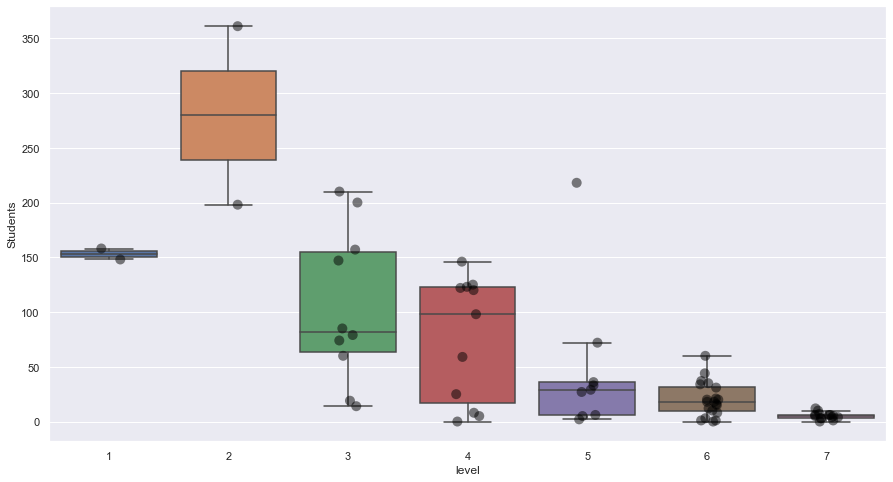

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(15,8)})

# there isn't enough data for a violin plot to work well. 
ax = sns.boxplot(data=courses, x="level", y="Students", fliersize=0)
ax = sns.stripplot(data=courses, x="level", y="Students", color="black", alpha=0.5, size=10)

#props = dict(linewidth=2)
# here we group by level
#courses.boxplot(by='level', figsize=(10, 10),  boxprops=props, medianprops=props, whiskerprops=props, capprops=props)

And plot a bar chart for the number of students at each level:

<AxesSubplot:xlabel='level'>

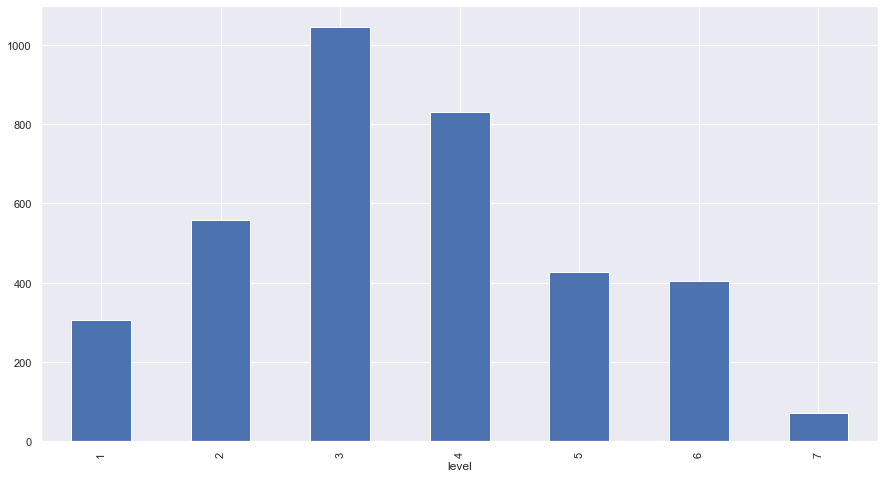

In [36]:
student_sum = courses.groupby("level").aggregate([np.sum])
student_sum.plot.bar(legend=False, figsize=(15, 8))

We can see that the most students are in the 3000 level.

## Scraping Wrap-Up

Scraping is a way to get information from website that were not designed to make data accessible. As such, it can often be **brittle**: a website change will break your scraping script. It is also often not welcome, as a scaper can cause a lot of traffic. 

The way we scraped information here also made the **assumption that HTML is generated consistently** based just on the URL. That is, unfortunately, less and less common, as websites adapt to browser types, resolutions, locales, but also as a lot of content is loaded dynamically e.g., via web-sockets. For example, many websites now auotmatically load more data once you scroll to the bottom of the page. These websites couldn't be scraped with our approach, instead, a browser-emulation approach, using e.g., [Selenium](https://www.selenium.dev/) would be necessary. [Here is a tutorial](https://medium.com/the-andela-way/introduction-to-web-scraping-using-selenium-7ec377a8cf72) on how to do that. 

Finally, many services make their data available through a well-defined interface, an API. Using an API is always a better idea than scraping, but scraping is a good fallback!